Функция генерации определенного количества СВ (для каждого закона)
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла

3 выборки:
до 10
до 20
до 40
до 100
и больше 100 на свой выбор

для выборок посчитать оценки
мат ожиадание
ско в двух видах (смещенная и несмещенная)
медиана

Вторая часть (на следующую пару)
добавить шум (по этому же закону и по другому)
посчитать корреляцию и ковариацию для исходного и зашумленного ряда 

Ход работы:
1) Биномиальное распределение

M(X) =  50.01
Standart deviation =  4.640032327473592
Median =  50.0


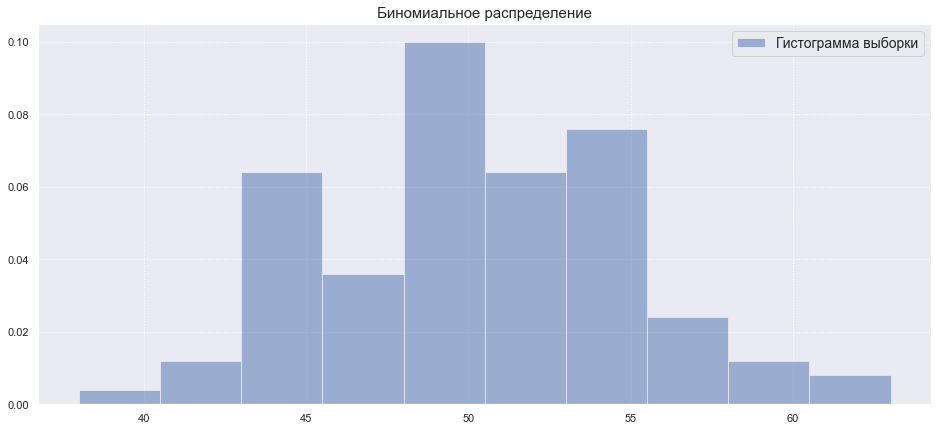

In [29]:
import scipy.stats as spystats
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

n, p, s = 100, 0.5, 100
binom_data = spystats.binom(n, p).rvs(size = s)
print("M(X) = ", binom_data.mean())
print("Standart deviation = ", binom_data.std())
print("Median = ", np.median(binom_data))

#median = np.median(binom_data)

#grid = np.linspace(-median - 5, median + 5, s)
plt.figure(figsize=(16, 7))
plt.hist(binom_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
#plt.plot(grid, spystats.binom(n, p).pmf(grid), color="red",
#        lw=5, label="Плотность случайной величины")
plt.title("Биномиальное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

2) Распределение Бернулли

M(X) =  0.5
Standart deviation =  0.5
Median =  0.5


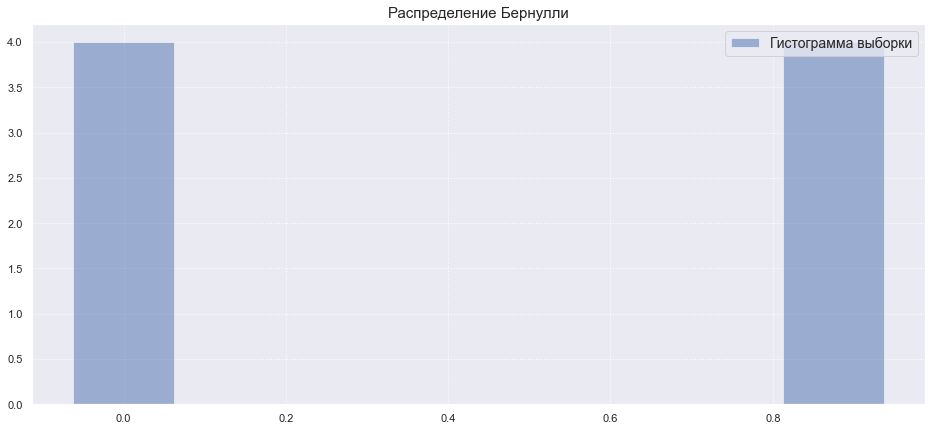

In [30]:
p, s = 0.5, 100
bern_data = spystats.bernoulli(p).rvs(size = s)
print("M(X) = ", bern_data.mean())
print("Standart deviation = ", bern_data.std())
print("Median = ", np.median(bern_data))

#median = np.median(bern_data)

#grid = np.linspace(-median - 5, median + 5, s)
plt.figure(figsize=(16, 7))
plt.hist(bern_data, bins="auto", density=True, align='left',
        alpha=0.5, label="Гистограмма выборки")
#plt.plot(grid, spystats.bernoulli(p).pmf(grid), color="red",
#        lw=5, label="Плотность случайной величины")
plt.title("Распределение Бернулли", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

3) Геометрическое распределение

M(X) =  2.0
Standart deviation =  1.3416407864998738
Median =  2.0


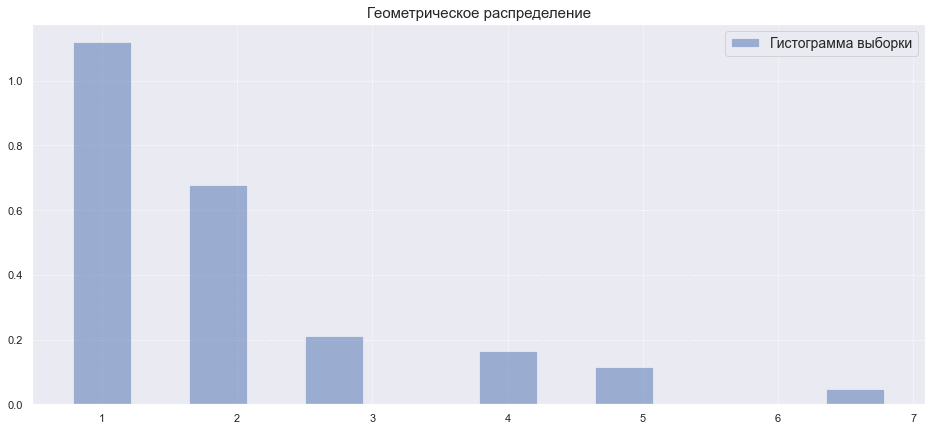

In [31]:
p, s = 0.5, 100
geom_data = spystats.geom(p).rvs(size = s)
print("M(X) = ", geom_data.mean())
print("Standart deviation = ", geom_data.std())
print("Median = ", np.median(geom_data))

#median = np.median(bern_data)

#grid = np.linspace(-median - 5, median + 5, s)
plt.figure(figsize=(16, 7))
plt.hist(geom_data, bins="auto", density=True, align='left',
        alpha=0.5, label="Гистограмма выборки")
#plt.plot(grid, spystats.geom(p).pmf(grid), color="red",
#        lw=5, label="Плотность случайной величины")
plt.title("Геометрическое распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

4) Распределение Пуассона

M(X) =  1.99
Standart deviation =  1.5132415537514161
Median =  2.0


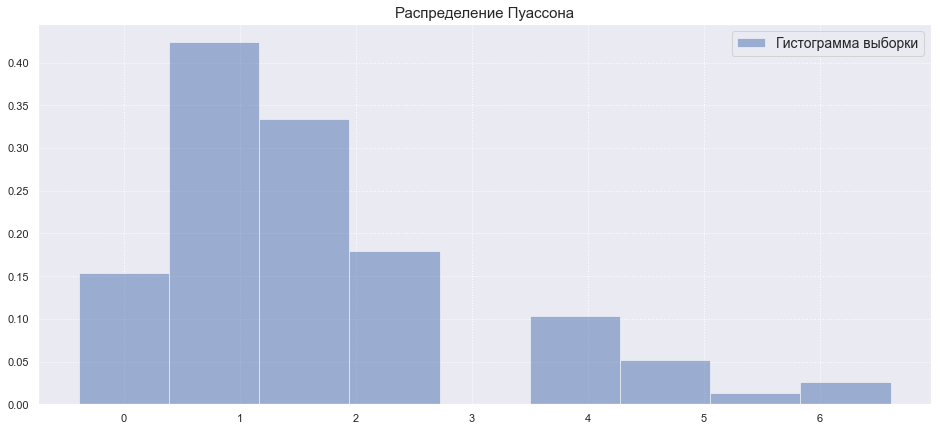

In [32]:
mu, s = 2, 100
poisson_data = spystats.poisson(mu).rvs(size = s)
print("M(X) = ", poisson_data.mean())
print("Standart deviation = ", poisson_data.std())
print("Median = ", np.median(poisson_data))

#median = np.median(bern_data)

#grid = np.linspace(-median - 5, median + 5, s)
plt.figure(figsize=(16, 7))
plt.hist(poisson_data, bins="auto", density=True, align='left',
        alpha=0.5, label="Гистограмма выборки")
#plt.plot(grid, spystats.poisson(mu).pmf(grid), color="red",
#        lw=5, label="Плотность случайной величины")
plt.title("Распределение Пуассона", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

5) Экспоненциальное распределение

M(X) =  0.9212154620072575
Standart deviation =  0.8706498334055118
Median =  0.6566972517732454


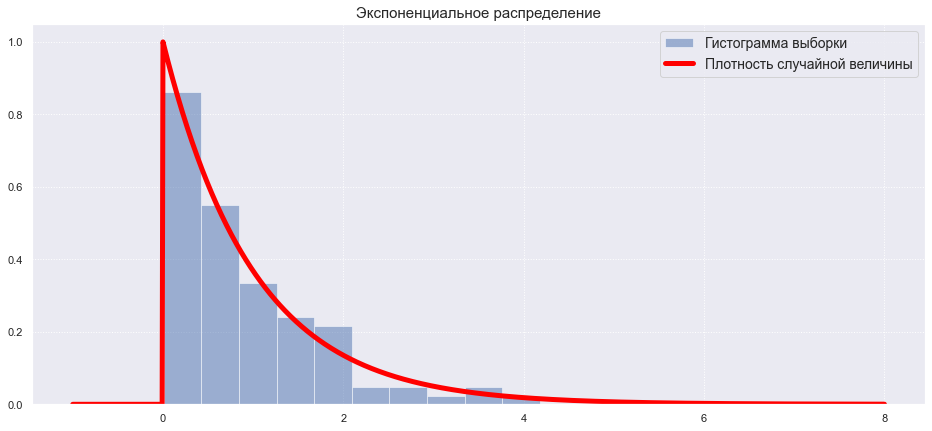

In [33]:
s = 100
expon_data = spystats.expon.rvs(size = s)
print("M(X) = ", expon_data.mean())
print("Standart deviation = ", expon_data.std())
print("Median = ", np.median(expon_data))

grid = np.linspace(-1, 8, 1000)
plt.figure(figsize=(16, 7))
plt.hist(expon_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.expon.pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Экспоненциальное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

6) Равномерное распределение

M(X) =  0.4637244806658559
Standart deviation =  0.282348129971859
Median =  0.4296131244377706


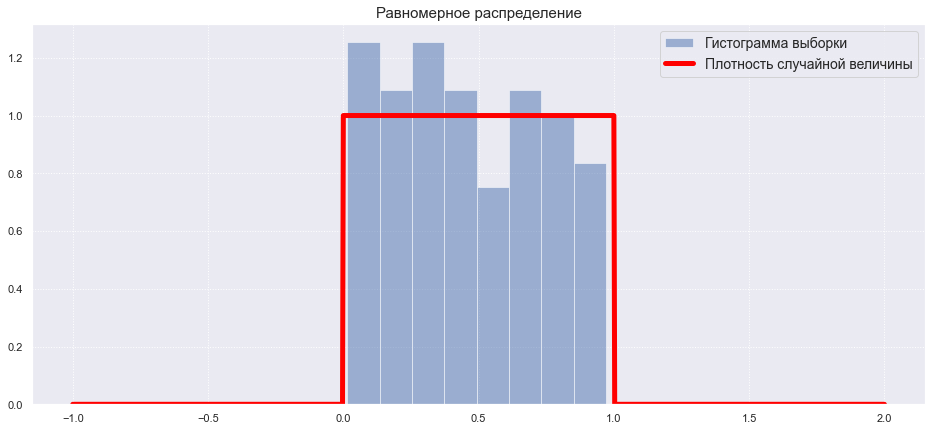

In [34]:
s = 100
uniform_data = spystats.uniform.rvs(size = s)
print("M(X) = ", uniform_data.mean())
print("Standart deviation = ", uniform_data.std())
print("Median = ", np.median(uniform_data))

grid = np.linspace(-1, 2, 1000)
plt.figure(figsize=(16, 7))
plt.hist(uniform_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.uniform.pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Равномерное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

7) Нормальное распределение

M(X) =  -0.07592030109007468
Standart deviation =  1.1028447354206696
Median =  -0.0007779979589654323


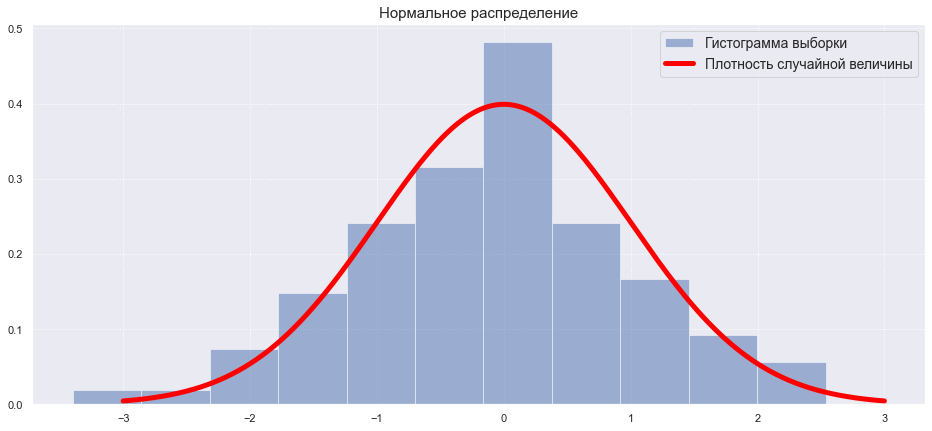

In [35]:
s = 100
norm_data = spystats.norm.rvs(size = s)
print("M(X) = ", norm_data.mean())
print("Standart deviation = ", norm_data.std())
print("Median = ", np.median(norm_data))

grid = np.linspace(-3, 3, 1000)
plt.figure(figsize=(16, 7))
plt.hist(norm_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.norm.pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Нормальное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

8) Распределение хи-квадрат

M(X) =  1.8846405611027857
Standart deviation =  1.8416337958071305
Median =  1.3400443568941065


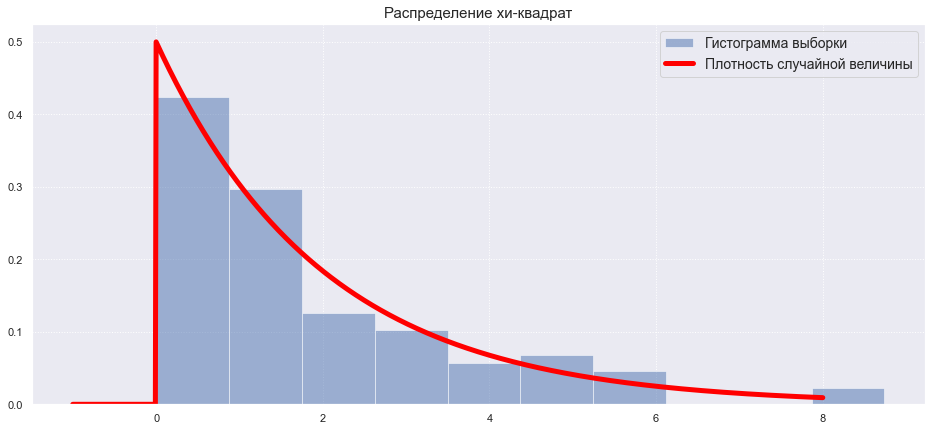

In [36]:
k, s = 2, 100
x2_data = spystats.chi2(k).rvs(size = s)
print("M(X) = ", x2_data.mean())
print("Standart deviation = ", x2_data.std())
print("Median = ", np.median(x2_data))

grid = np.linspace(-1, 8, 1000)
plt.figure(figsize=(16, 7))
plt.hist(x2_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.chi2(k).pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Распределение хи-квадрат", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

9) Распределение Стьюдента

M(X) =  0.02686318230979528
Standart deviation =  2.824923882337018
Median =  -0.14613530252626772


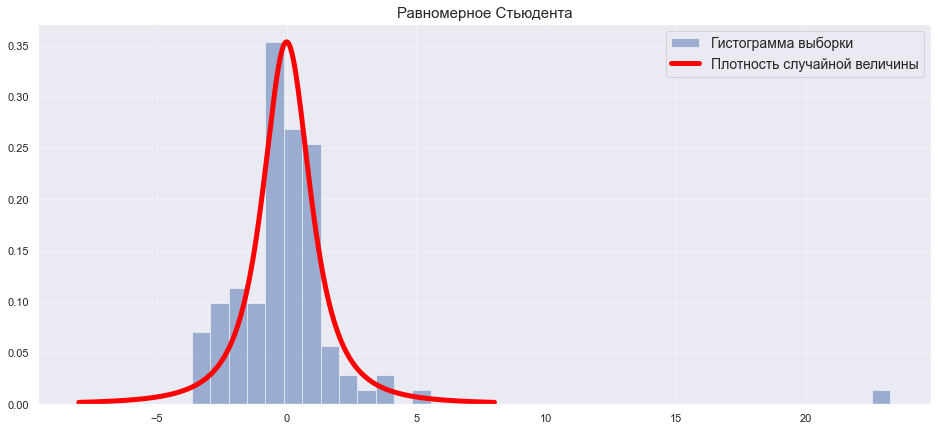

In [37]:
k, s = 2, 100
t_data = spystats.t(k).rvs(size = s)
print("M(X) = ", t_data.mean())
print("Standart deviation = ", t_data.std())
print("Median = ", np.median(t_data))

grid = np.linspace(-8, 8, 1000)
plt.figure(figsize=(16, 7))
plt.hist(t_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.t(k).pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Равномерное Стьюдента", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

10) Распределение Фишера

M(X) =  1.0800672947440537
Standart deviation =  5.2490336661776995
Median =  1.1725755352112839


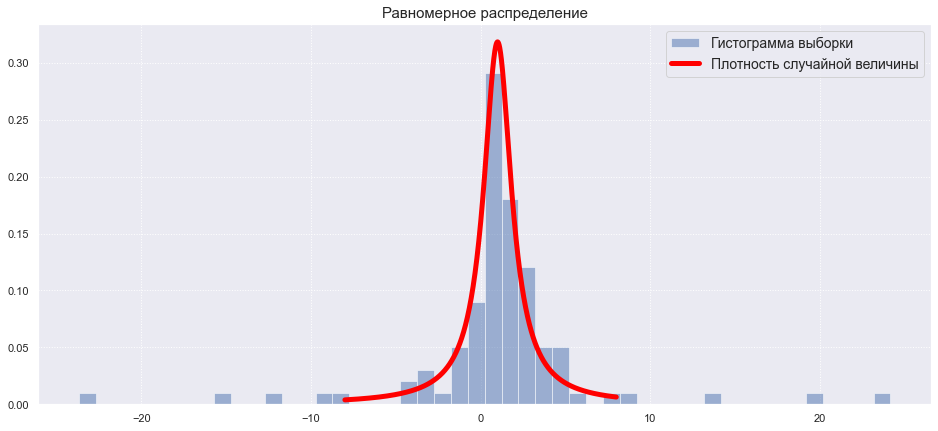

In [47]:
d1, d2, s = 1, 1, 100
f_data = spystats.t(d1, d2).rvs(size = s)
print("M(X) = ", f_data.mean())
print("Standart deviation = ", f_data.std())
print("Median = ", np.median(f_data))

grid = np.linspace(-8, 8, 1000)
plt.figure(figsize=(16, 7))
plt.hist(f_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.t(d1, d2).pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Равномерное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

11) Распределение Вейбулла

M(X) =  0.9181636788646421
Standart deviation =  0.4645342061624486
Median =  0.877031700059413


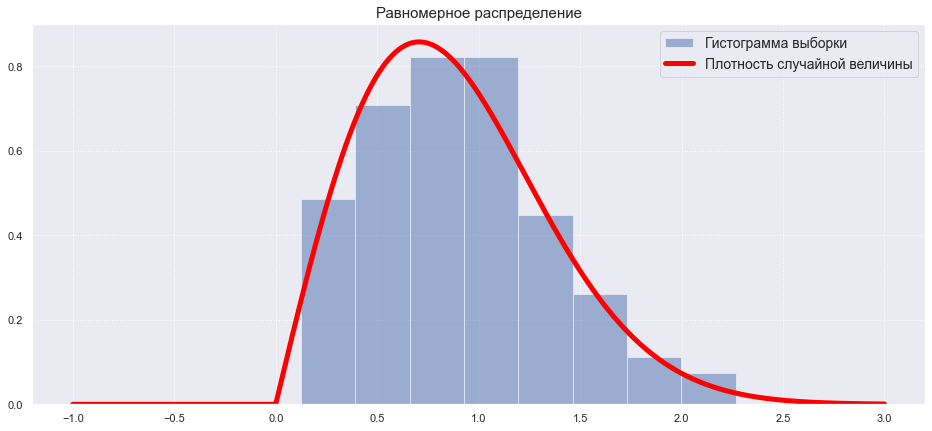

In [39]:
c, s = 2, 100
weibull_data = spystats.weibull_min(c).rvs(size = s)
print("M(X) = ", weibull_data.mean())
print("Standart deviation = ", weibull_data.std())
print("Median = ", np.median(weibull_data))

grid = np.linspace(-1, 3, 1000)
plt.figure(figsize=(16, 7))
plt.hist(weibull_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.weibull_min(c).pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Равномерное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()